In [1]:
# --- Notebook Theme (codes from @vivek468 & @sonalisingh1411) ---
from IPython.core.display import display, HTML, Javascript

color_map = ['#219EBC', '#80CED7']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 215, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 215, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 5px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;


}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 85%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

# <h1 style="font-family: Times New Roman; padding: 12px; font-size: 48px; color: #ff4f33; text-align: center; line-height: 1.25;"><b>Diabetes💓</b><br><span style="color: #000000"> Do you have diabetes?☠</span></b><br><span style="color: #219EBC; font-size: 24px">Want to know about it. Let’s dive in!!🧙‍♂️</span></h1>
<hr>

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction</div>

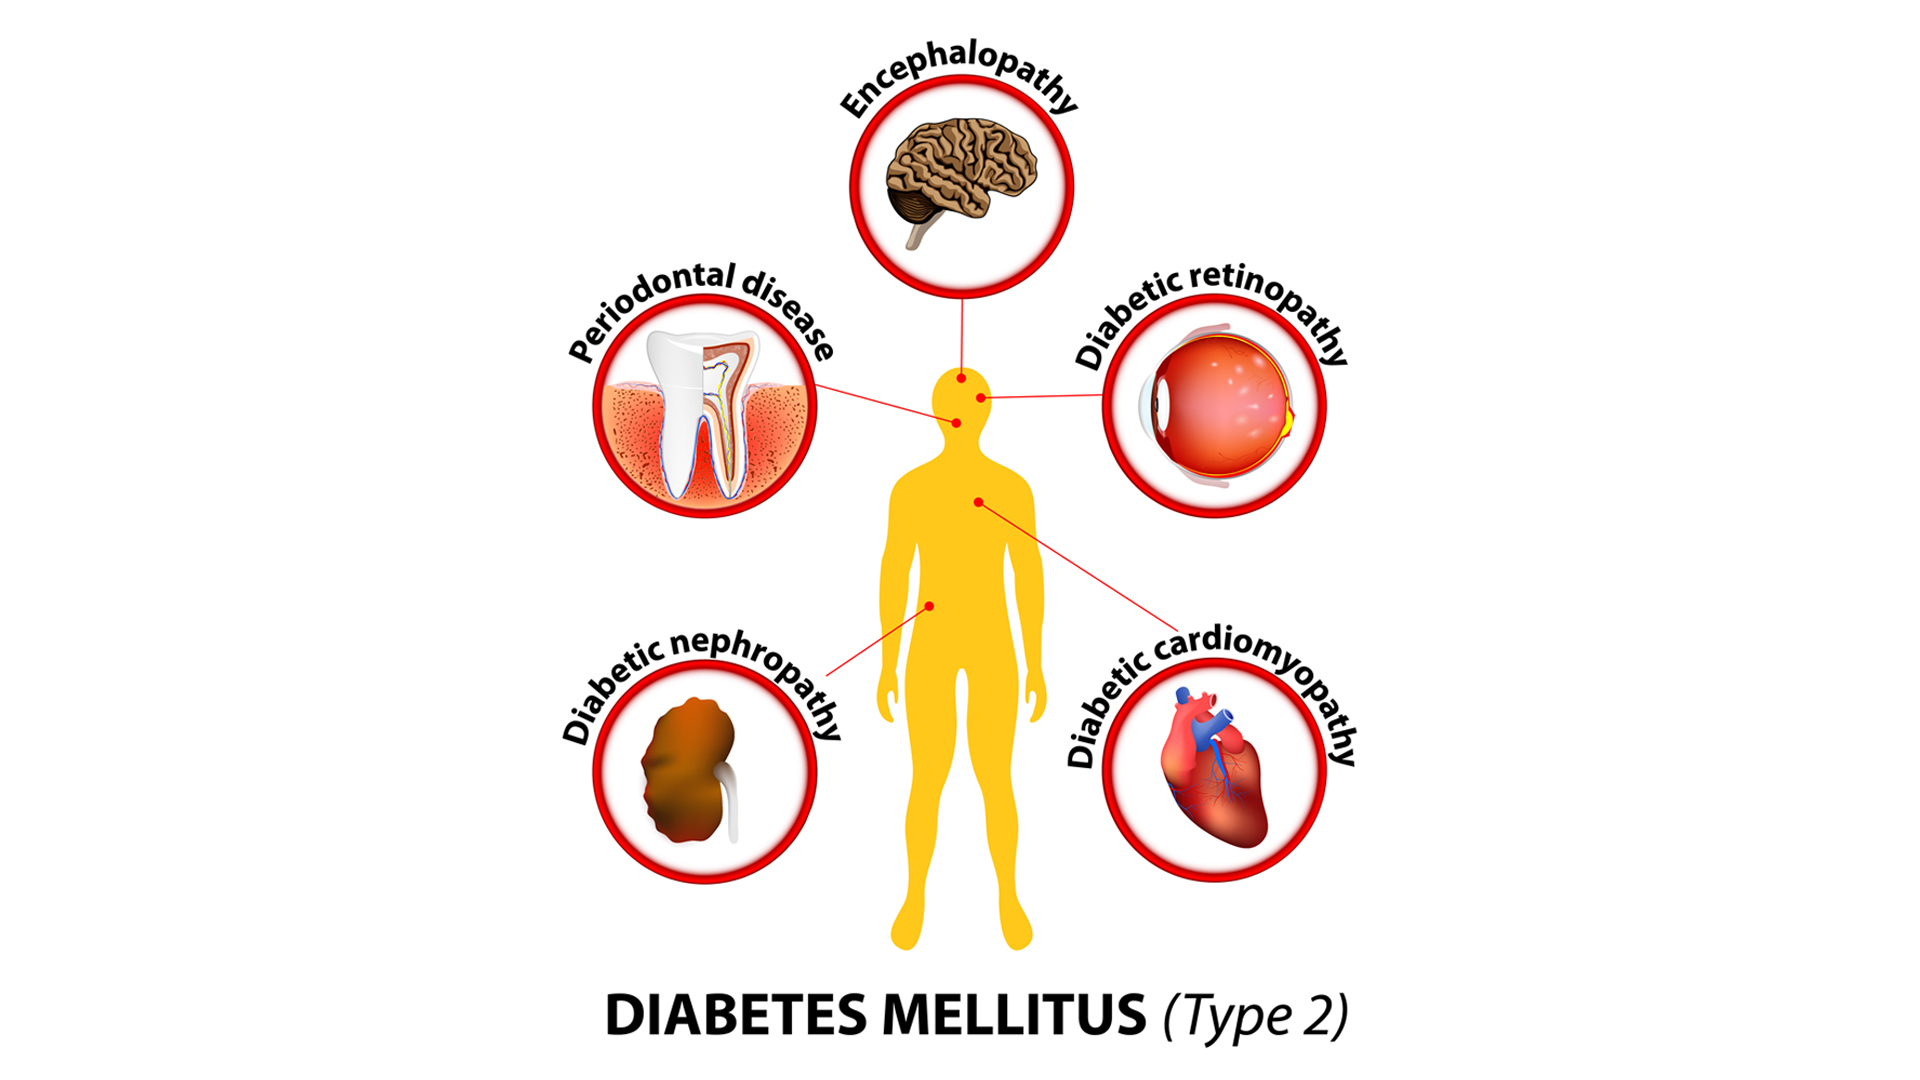


# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Problem Statement</div>
<div style="font-family: Times New Roman; line-height: 2; color: #000000; text-align: justify">
👉 <b>This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.Build a model to accurately predict whether the patients in the dataset have diabetes or not?</b>


## <div style="font-family: Times New Roman; background-color: #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Notebook Objectives 📌</div>
<div style="font-family: Times New Roman; line-height: 2; color: #000000; text-align: justify">
    👉 <b>This notebook aims to</b>:
    <ol>
        <li><mark><b>Preliminary analysis:</b></mark><ul>
<li>Perform preliminary data inspection and report the findings on the structure of the data, missing values, duplicates, etc.
</li><li>Based on these findings, remove duplicates (if any) and treat missing values using an appropriate strategy
</li></ul>
        </li>
        <li><mark><b>Create scatter charts between the pair of variables to understand the relationships. Describe your findings.</b></mark> </li>
          <li><mark><b>Perform correlation analysis. Visually explore it using a heat map.</b></mark></li>
        <li><mark><b>Devise strategies for model building. It is important to decide the right validation framework. Express your thought process. Would Cross validation be useful in this scenario?</b></mark></li>
        <li><mark><b>Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN.</b></mark></li>
                <li><mark><b>Create a classification report by analysing sensitivity, specificity, AUC(ROC curve) etc. Please try to be as descriptive as possible to explain what values of these parameter you settled for? any why?</b></mark></li>
    </ol>
</div>

## <div style="font-family: Times New Roman; background-color: #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Description 📌</div>
<div>
    <table style = "border: 1px solid black;border-collapse: collapse;font-family: Times New Roman;">
		<tr>
			<td><strong>Variables</strong></td>
			<td><strong>Description</strong></td>
		</tr>
		<tr>
			<td>Pregnancies</td>
			<td>Number of times pregnant</td>
		</tr>
		<tr>
			<td>Glucose</td>
			<td>Plasma glucose concentration in an oral glucose tolerance test</td>
		</tr>
		<tr>
			<td>BloodPressure</td>
			<td>Diastolic blood pressure (mm Hg)</td>
		</tr>
		<tr>
			<td>SkinThickness</td>
			<td>Triceps skinfold thickness (mm)</td>
		</tr>
		<tr>
			<td>Insulin</td>
			<td>Two hour serum insulin</td>
		</tr>
		<tr>
			<td>BMI</td>
			<td>Body Mass Index</td>
		</tr>
		<tr>
			<td>DiabetesPedigreeFunction</td>
			<td>Diabetes pedigree function</td>
		</tr>
		<tr>
			<td>Age</td>
			<td>Age in years</td>
		</tr>
		<tr>
			<td>Outcome</td>
			<td>Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0</td>
		</tr>
</table>
</div>

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Required Libraries📚</div>

In [2]:
#to handle datasets
import pandas as pd
import numpy as np

#for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#sns.set(rc={'axes.facecolor': '#FBFBFB', 'figure.facecolor': '#FBFBFB'})
sns.set_style('white')
plt.rcParams['figure.dpi']=180

#for displaying max columns
pd.pandas.set_option('display.max_columns',None)

#for statistical transfromation
from scipy.stats import norm
from scipy import stats

#for splitting the dataset
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#feature scaling
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Reading Dataset🧐</div>

In [3]:
df = pd.read_csv('health care diabetes.csv')

df.head(20).style.background_gradient(cmap='Blues').set_properties(**{'font-family': 'Times New Roman'})#.hide_index()

In [4]:
#shape of the dataset
df.shape

(768, 9)

In [5]:
#Data Types information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

# <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Data Analysis🧐</div>
<div style="font-family: Times New Roman;"><b>👉We will analyse the following:</b>
<ul>
    <li>The target variable
    </li><li>Variable types (categorical and numerical)
    </li><li>Missing data
    </li><li>Numerical variables</li>
    <ol>
         <li>    Discrete
    </li><li>    Continuous
    </li><li>    Distributions
    </li><li>    Transformations</li>   
    </ol>
    <li>    Categorical variables</li>
    <ol>
        <li>    Cardinality
    </li><li>    Rare Labels</li>
    <li>    Special mappings</li>
    </ol>
</ul></div>

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.1 | Target Variable Analysis🧐</div>

In [7]:
def target_var_analysis(df):
    df = df.copy()
    df['Outcome_descr'] = np.where(df['Outcome']==0,'Non Diabetes','Diabetes')
    plt.figure(figsize = (8,3))
    plt.suptitle('Prone to Diabetes', fontweight='heavy', x=0.125, y=1.12, ha='left', fontsize=20) 
    
    plt.subplot(1,2,1)
    plt.title('Is pregnancy the reason behind diabetes?\n', style='italic', fontsize=10, loc='left')
    ax = sns.countplot(x = df['Outcome_descr'],palette = "Set2")
    ax.bar_label(ax.containers[0])#Here, we are adding the container that is holding the count to bar_label
    ax.axes.yaxis.set_ticks([])
    ax.set(xlabel = None)
    #plt.axis('off')
    #plt.xlabel('\nTitles', fontweight='bold', fontsize=8, fontfamily='sans-serif')
    plt.ylabel('Count\n', fontweight='bold', fontsize=8, fontfamily='sans-serif')
    plt.axvspan(-1.45, 4.15, color='#FAF884', alpha=0.2, zorder=2)
    plt.xticks(fontsize=7, rotation=90)
    plt.yticks(ticks = None)
    #plt.axis('off')
    #sns.despine()
    plt.box(on=False) #to hide spines
    
    plt.subplot(1,2,2)
    df['Outcome'].value_counts().plot(kind='pie',autopct='%1.0f%%',colors = ['#f96849','#e5e5e5'], explode = (0.02, 0),labels = ['Non Diabetes','Diabetes'],fontsize = 8)
    plt.ylabel(None)
    plt.axis('off')#to get rid of ticks and axis
    #plt.box(on=False)
    #plt.xticks(ticks = None)
    #plt.yticks(ticks = None)
    
    
    plt.show()

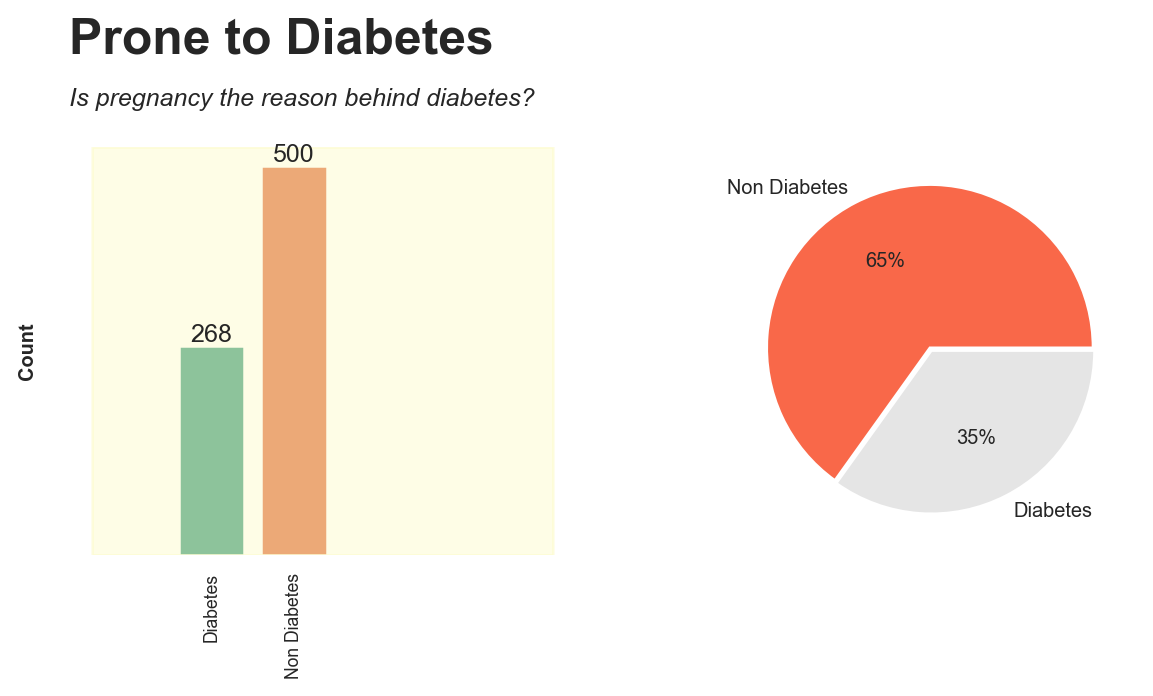

In [8]:
target_var_analysis(df)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.2 | Variable Type Analysis🧐</div>

It is observed that all variables in dataset are <mark><b>numerical</b></mark> by using df.info() in Section.2

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.3 | Missing Data Analysis🧐</div>

In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<div style="font-family: Times New Roman;">It can be observed that the data is clean <b><strong>but a value of zero does not make sense for mentioned columns</b></strong> and thus indicates missing value:
<ul><li>Glucose
</li><li>BloodPressure
</li><li>SkinThickness
</li><li>Insulin
</li><li>BMI
</li></ul></div>


## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.4 | Duplicate Data Analysis🧐</div>

In [10]:
df.duplicated().sum()

0

<div style="font-family: Times New Roman;">It can be observed that there are no duplicate values in the dataset.</div>

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.5 | Numerical Variable Analysis🧐</div>

In [11]:
df_num_dis = [var for var in df.columns if df[var].nunique()<15 and var!= 'Outcome']
print("No of discrete values: {} and they are: {}".format(len(df_num_dis),df_num_dis))
df_num_con = [var for var in df.columns if var not in df_num_dis and var!= 'Outcome']
print("No of continuous values: {} and they are: {}".format(len(df_num_con),df_num_con))

No of discrete values: 0 and they are: []
No of continuous values: 8 and they are: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [12]:
#Before doing further analysis on the numeric continuous data, let's replace the zero values with median of the columns
#So that we have a proper analysis of the dataset
#let's take copy of the data
df_original = df.copy()

In [13]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI']=df['BMI'].replace(0,df['BMI'].mean())

In [14]:
df.head()
df.to_csv('final_file.csv')

In [15]:
#Continuous value analysis
def set_spines_visibility(ax, is_visible):
    for s in ['left', 'right', 'top', 'bottom']:
        ax.spines[s].set_visible(is_visible)
        
def num_con_norm_analysis(df,con_var):
    df = df.copy()
    length = len(con_var)
    
    if length%2 == 0:
        fig, ax = plt.subplots(length//2+1,2,figsize = (10,20))
    else:
        fig,ax = plt.subplots(length//2+1,2,figsize = (10,20))
        
    ax[0,0].text(x=0.5, y=0.5, s="Distribution plot for \n Continuous variables",
        verticalalignment='center', horizontalalignment='center',
        fontsize='25', fontweight='bold')
    ax[0,0].axis('off')
    
    row = 0
    for i,var in enumerate(con_var):
        i=i+1
        if i%2 == 1:
            set_spines_visibility(ax[row,1], False)
            sns.distplot(ax = ax[row,1],x=df[var],fit=norm)
        else:
            row = row+1
            set_spines_visibility(ax[row,0], False)
            sns.distplot(ax = ax[row,0],x=df[var],fit=norm)
    ax[length//2,1].axis('off')
    plt.show()
    

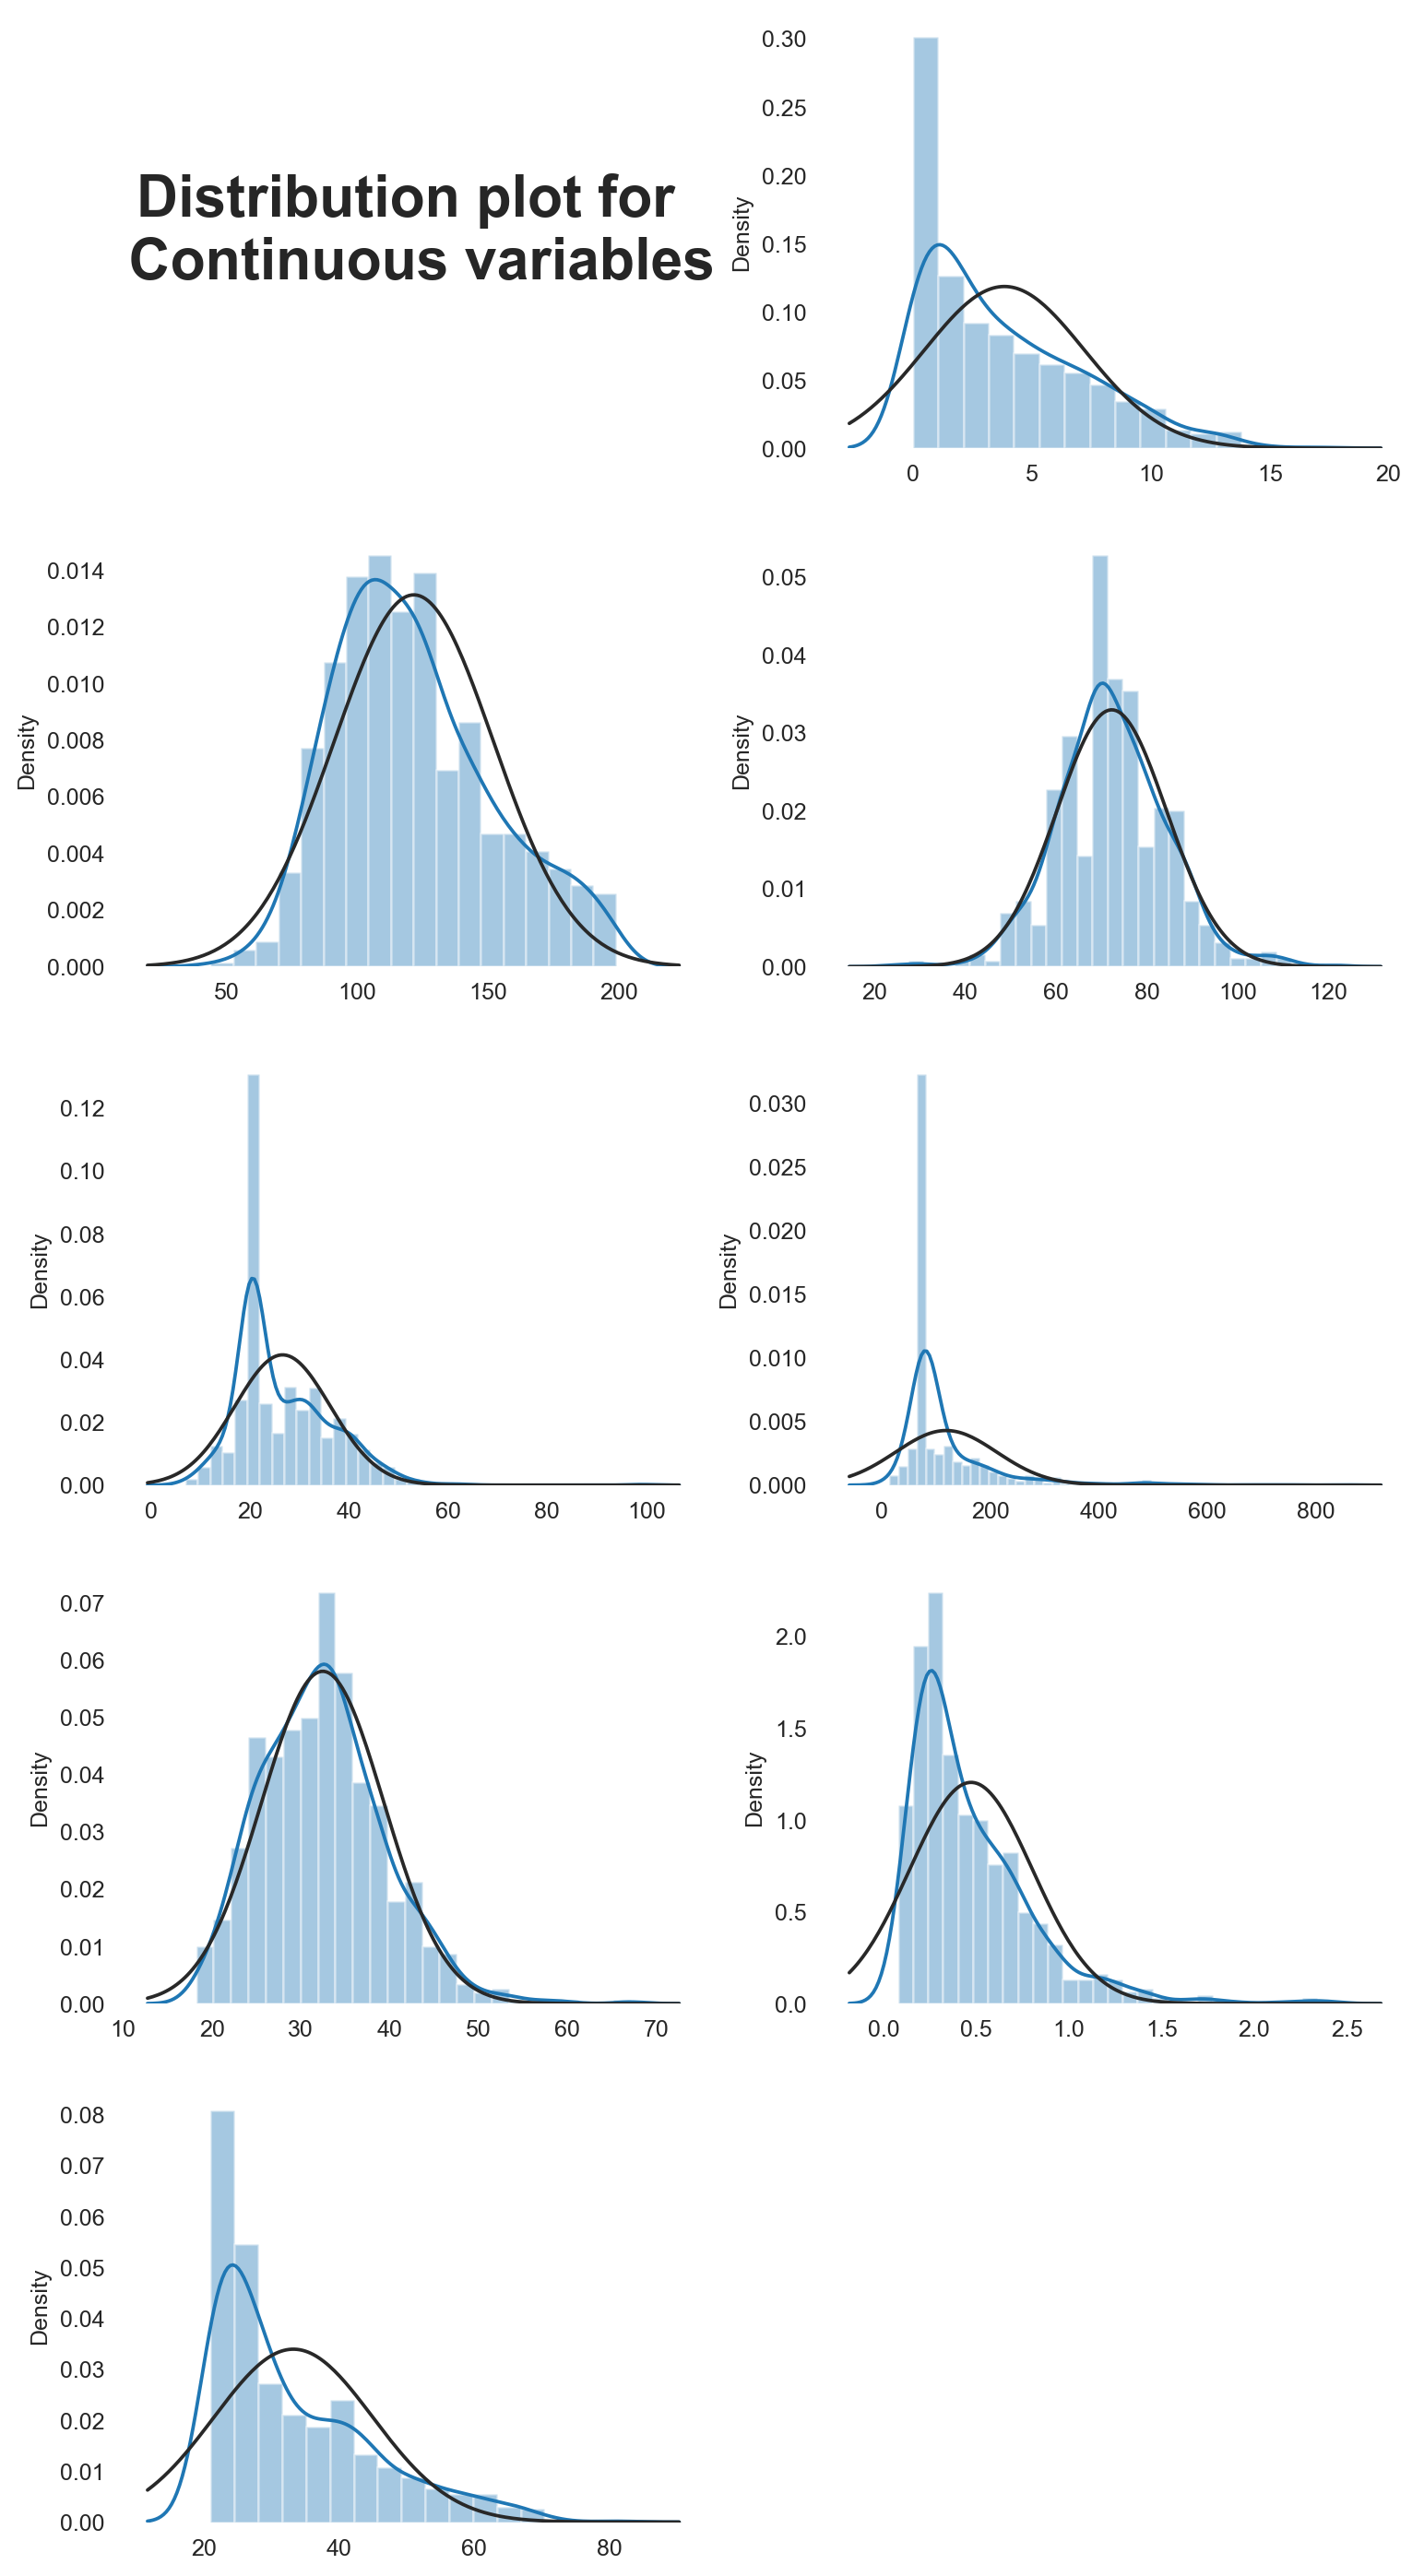

In [16]:
num_con_norm_analysis(df,df_num_con)

In [17]:
#It's clearly visible that the continuous variables are showing skewness
df[df_num_con].skew(axis=0)

Pregnancies                 0.901674
Glucose                     0.533225
BloodPressure               0.173050
SkinThickness               1.226670
Insulin                     3.291825
BMI                         0.601103
DiabetesPedigreeFunction    1.919911
Age                         1.129597
dtype: float64

From the above distplot(kdeplot+histplot) and skew(), it can be observed that the continuous numerical variable - Pregnancies,SkinThickness, Insulin, DiabetesPedigreeFunction, Age are highly skewed. Let's apply box-cox to it.

In [18]:
def transform_skewed_neg_var(df,skewed_variable):
    df = df.copy()
    
   
    df[skewed_variable] = stats.boxcox(df[skewed_variable]+10)[0]
    print(df[skewed_variable].skew(axis = 0))
    plt.figure(figsize = (20,10))    
    #visulaize the same
    plt.subplot(1, 2, 1)
    sns.distplot(df[skewed_variable])
    plt.box(on = False)
    plt.subplot(1, 2, 2)
    stats.probplot(df[skewed_variable], dist="norm", plot=plt)
    plt.box(on = False)
    plt.show()

0.10729737758500126


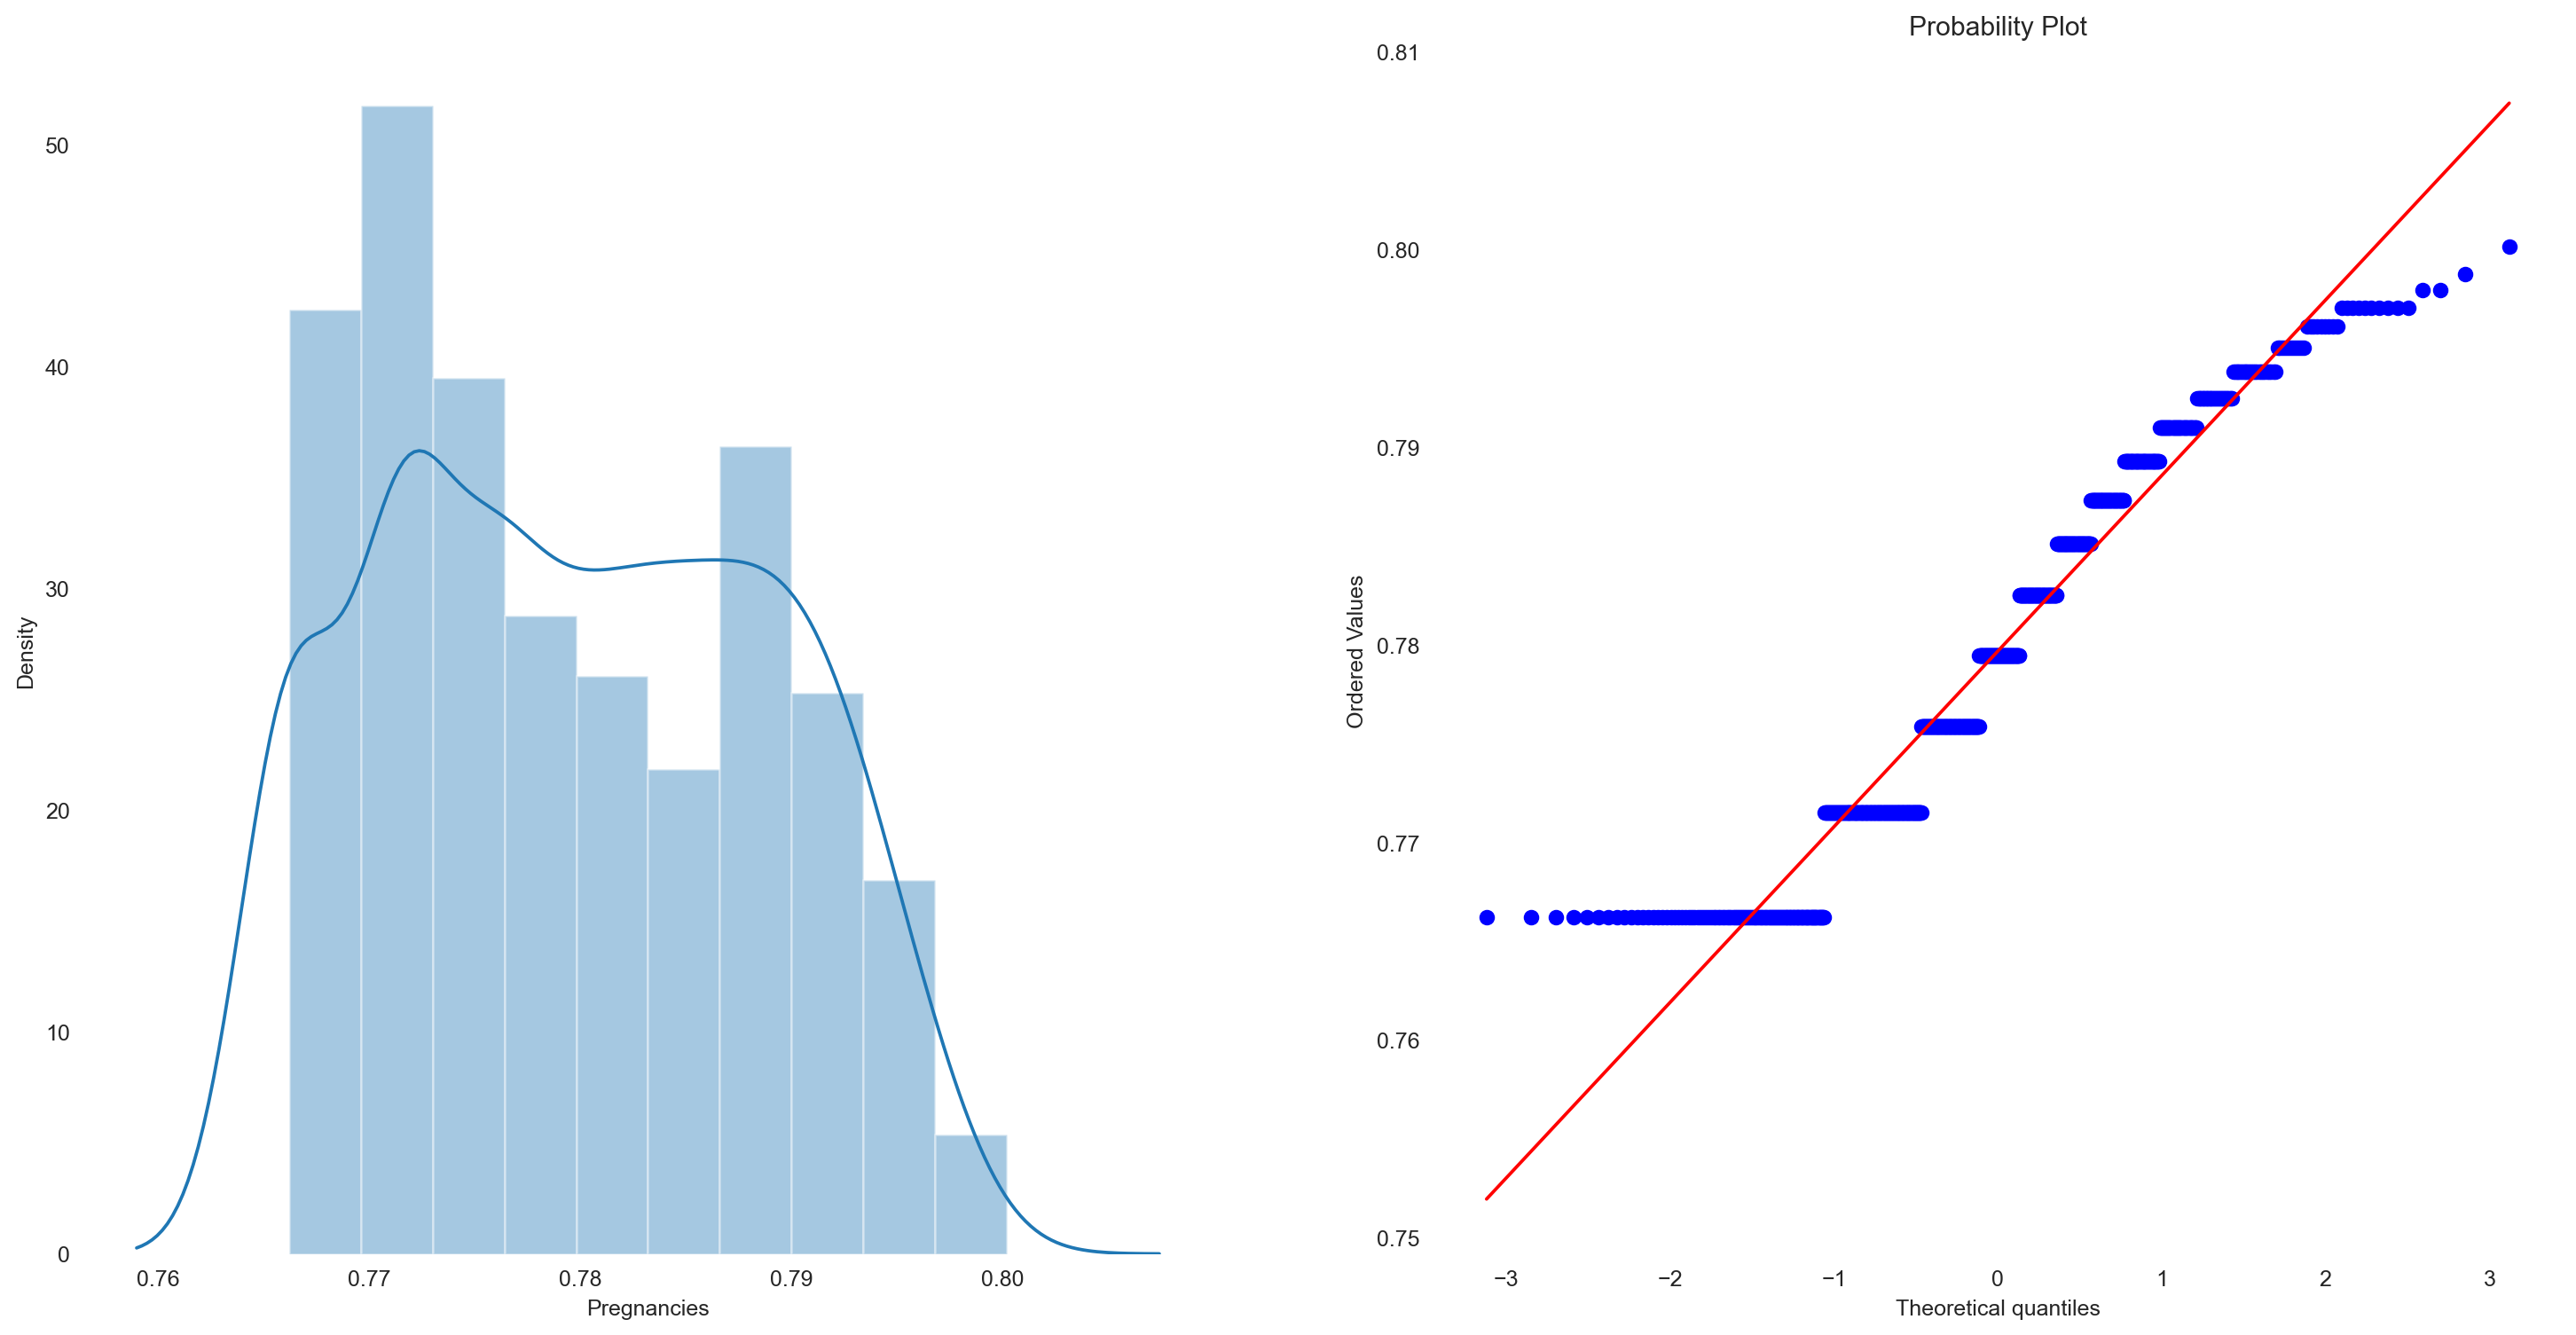

In [19]:
transform_skewed_neg_var(df,'Pregnancies')

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.6 | Bivariate Analysis🧐</div>

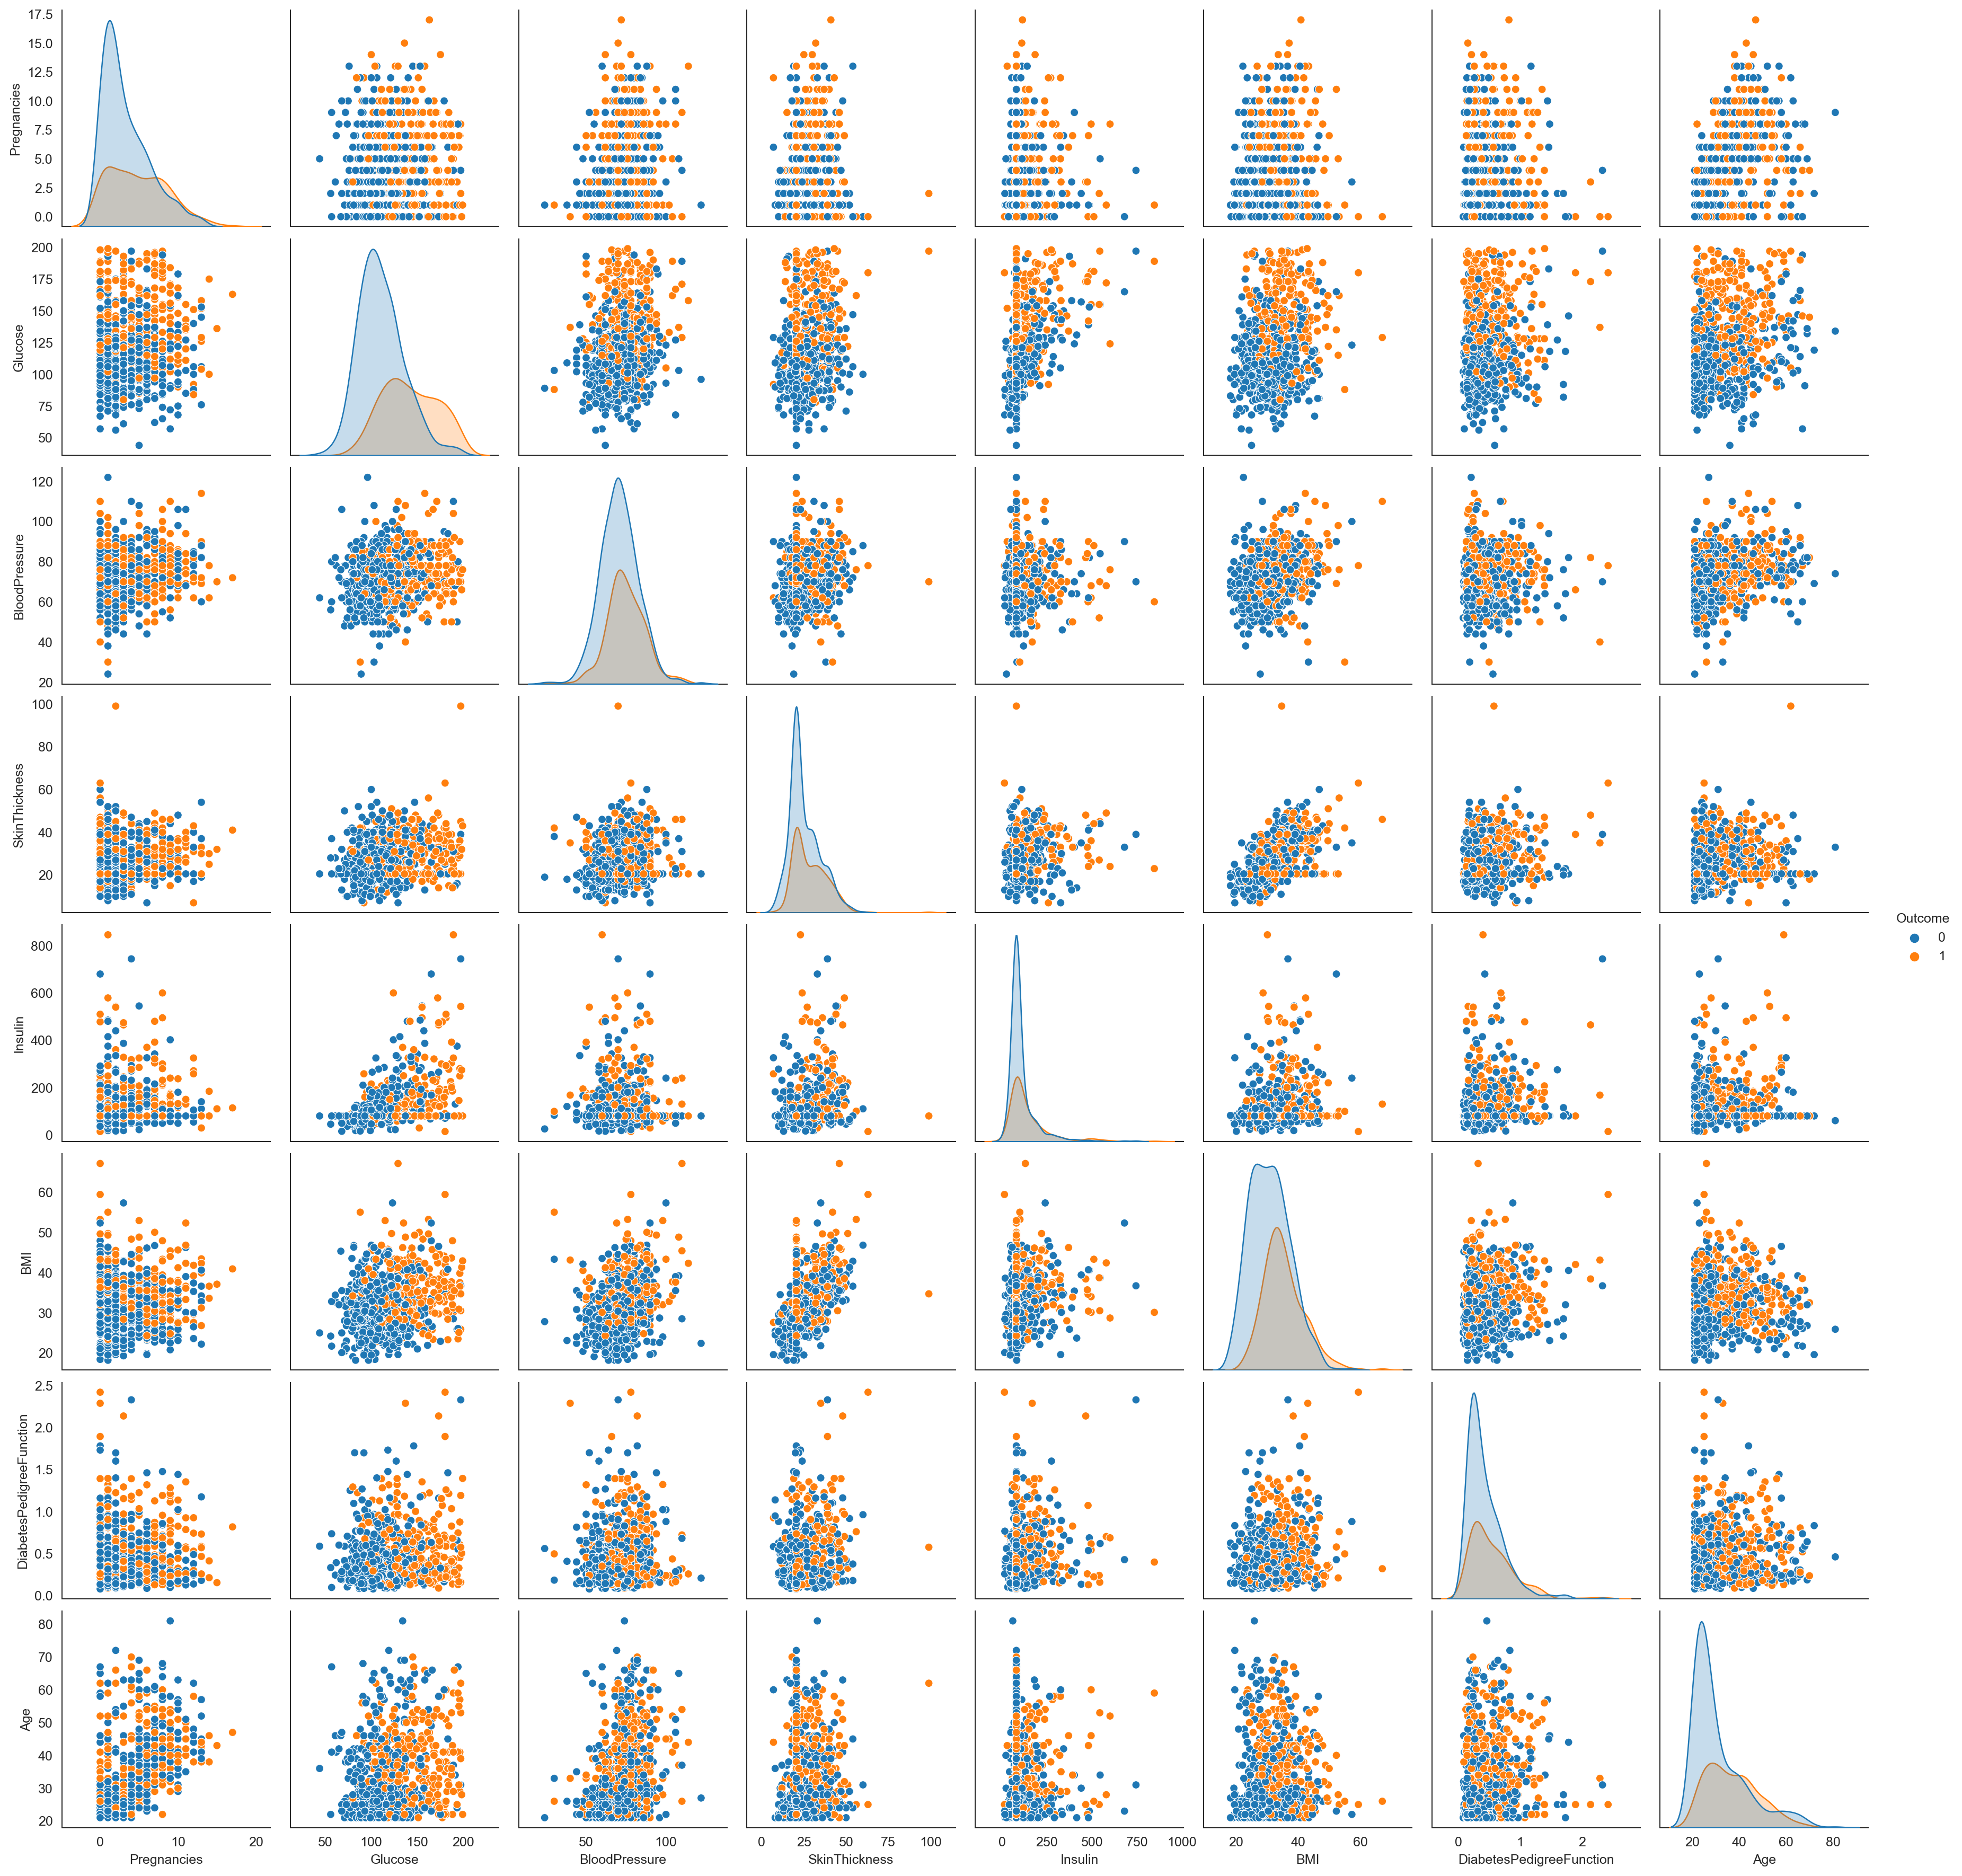

In [20]:
sns.pairplot(df, hue = 'Outcome')

It is observed that most of the independent variables shows direct relationship with other independent variables as well as dependent variables i.e., whenever any independent variables are increasing then the target human is getting more prone to diabetes.

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">3.6 | Multi-Variate Analysis🧐</div>

In [21]:
def multi_var(df):
    df = df.copy()
    sns.set(font_scale=1.15)
    plt.figure(figsize=(15,8))
    
    sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

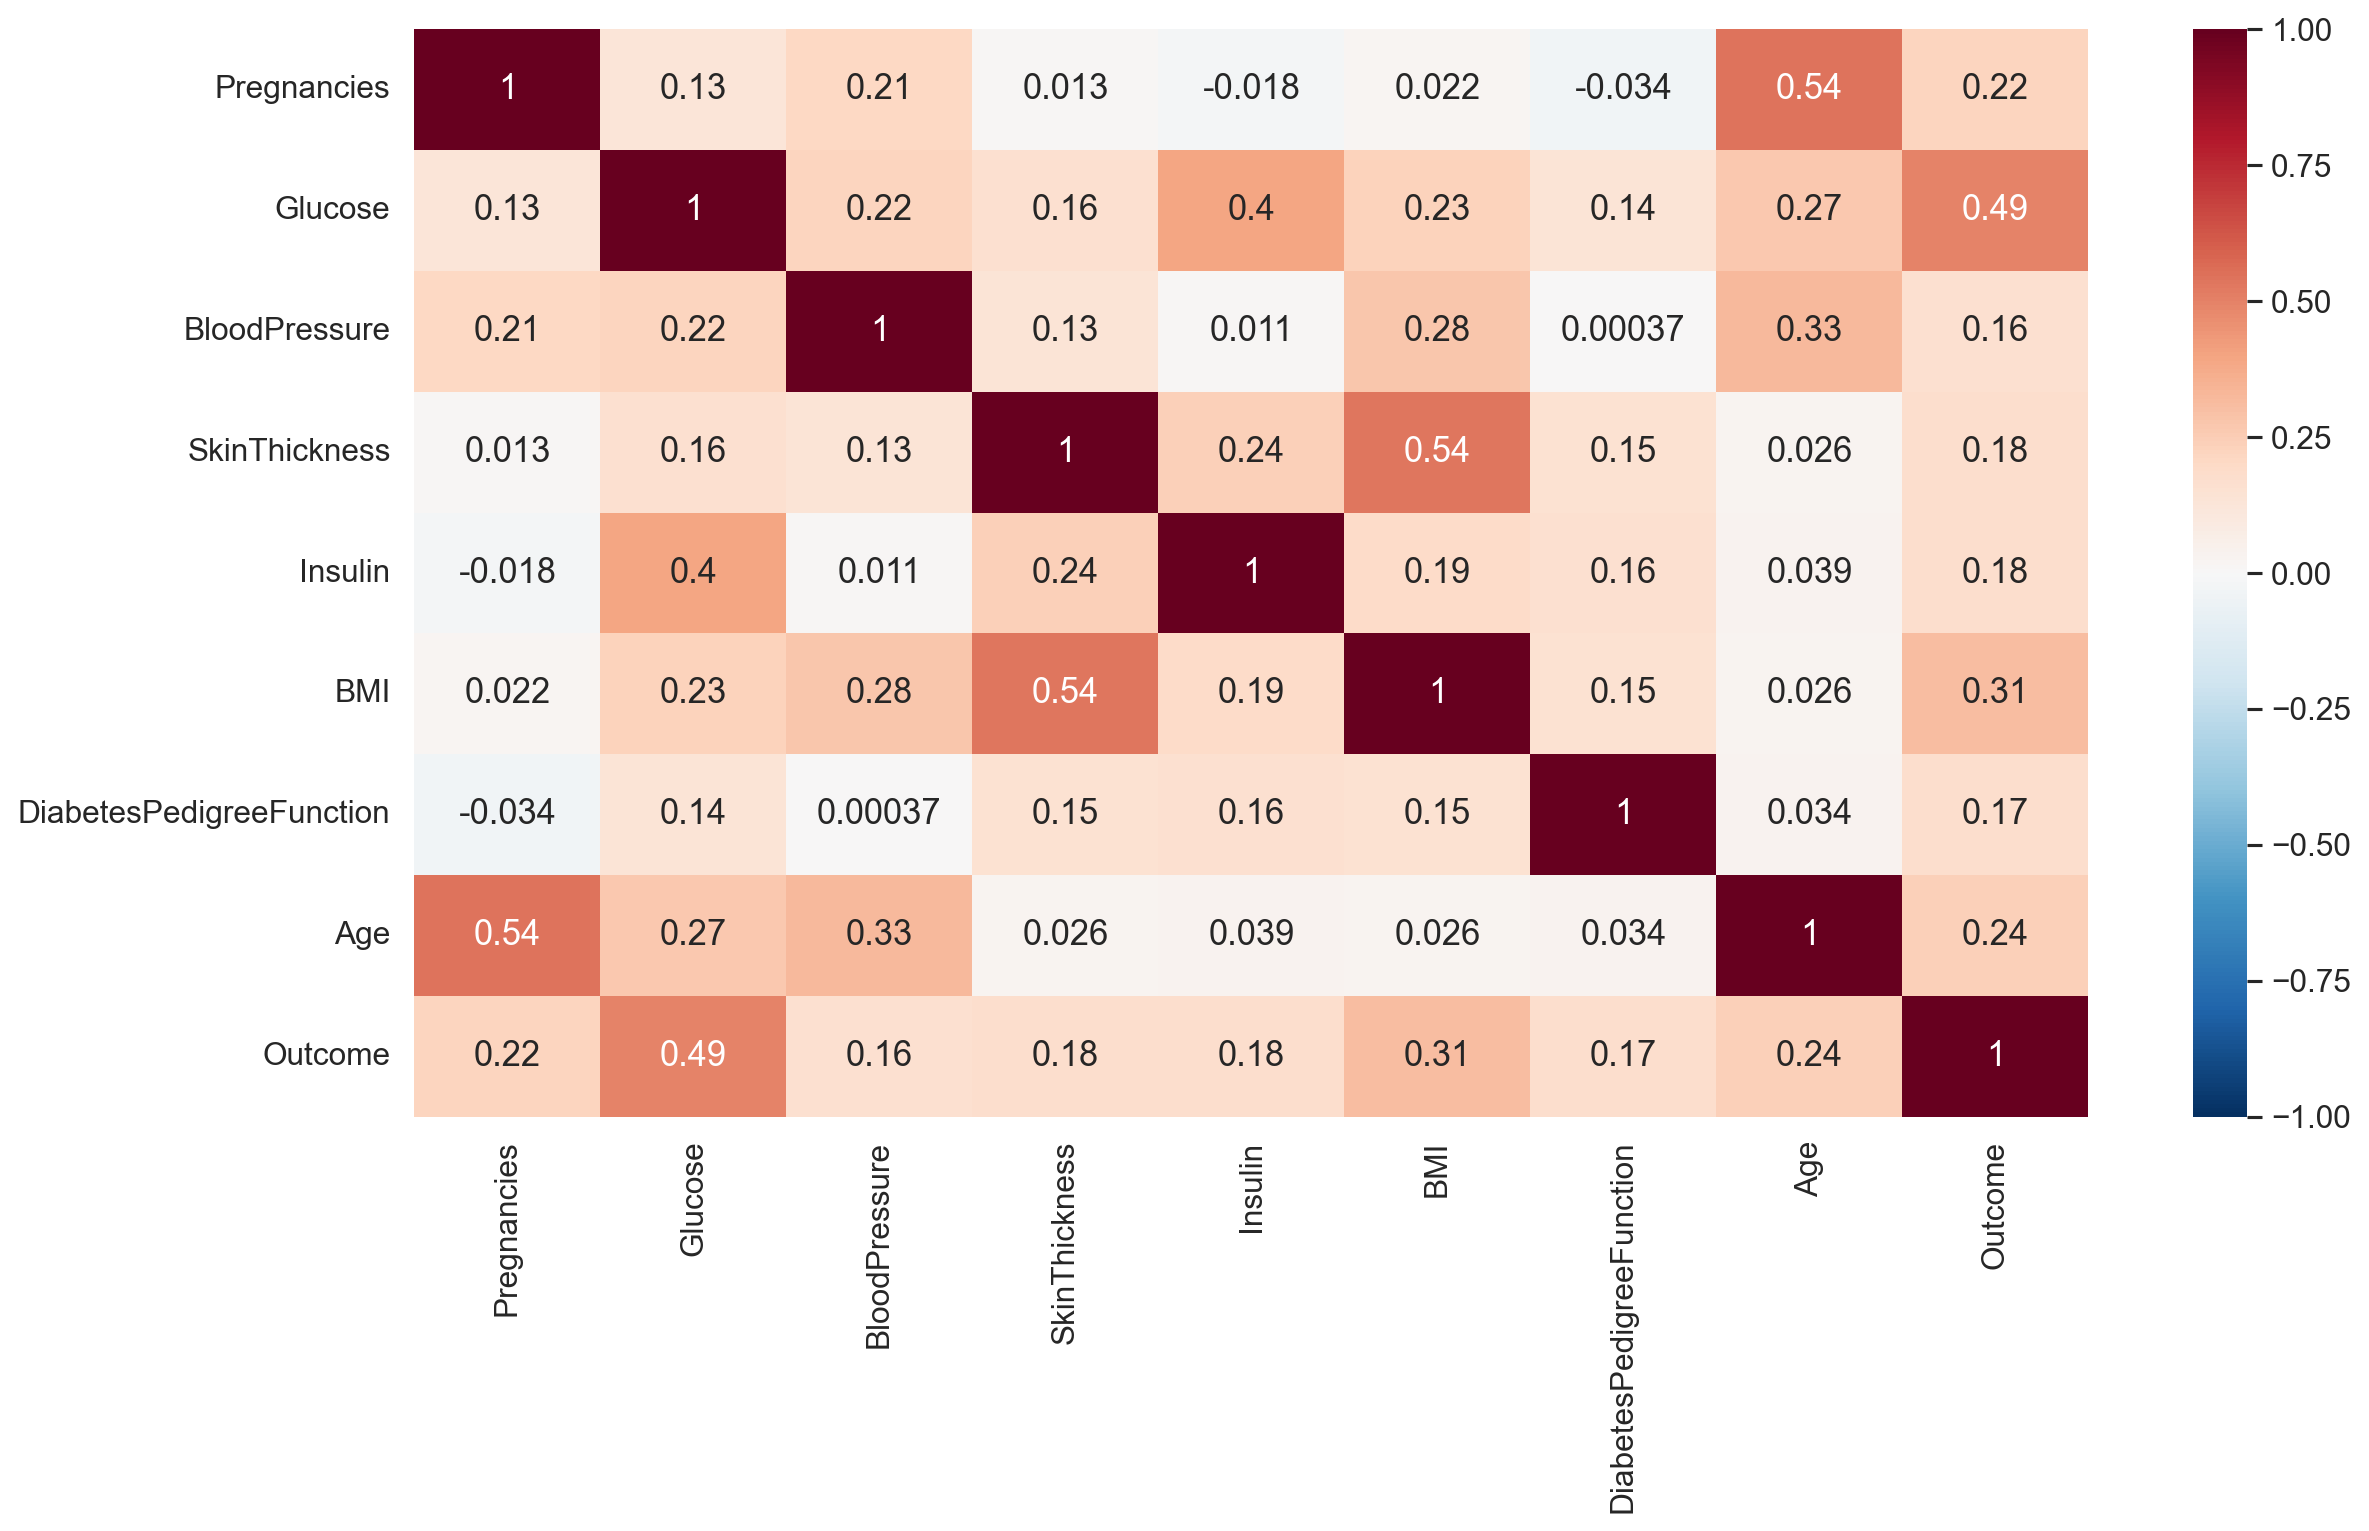

In [22]:
multi_var(df)

The above heatmap shows the correlation of independent variables

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4 | Feature Enginerring👨‍🔧👷‍♂️</div>

The below variables need to be normalized. Hence, using Boxcox for this purpose

In [23]:
#Pregnancies,SkinThickness, Insulin, DiabetesPedigreeFunction, Age
df['Pregnancies'] = stats.boxcox(df['Pregnancies']+10)[0]
print(df['Pregnancies'].skew(axis = 0))
df['SkinThickness'] = stats.boxcox(df['SkinThickness']+10)[0]
print(df['SkinThickness'].skew(axis = 0))
df['Insulin'] = stats.boxcox(df['Insulin']+10)[0]
print(df['Insulin'].skew(axis = 0))
df['DiabetesPedigreeFunction'] = stats.boxcox(df['DiabetesPedigreeFunction']+10)[0]
print(df['DiabetesPedigreeFunction'].skew(axis = 0))
df['Age'] = stats.boxcox(df['Age']+10)[0]
print(df['Age'].skew(axis = 0))

0.10729737758500126
-0.0016120495159331438
-0.15224873571119626
0
0.17319415076659977


## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.1 | Split DataSet Into Train and Test Set ✂</div>

In [24]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.30, random_state = 1, stratify = y)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">4.2 | Feature Scaling 📏📐</div>

In [25]:
#Feature Scaling

#create scaler
scaler = MinMaxScaler()

scaler = scaler.fit(X_train)

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)

## <div style="font-family: Times New Roman; background-color:  #ff4f33; color: #FFFFFF; padding: 12px; line-height: 1.5;">5.0 | Modelling👨‍🔧👩‍🔧</div>

Here, Cross-validation needs to be used to validate the efficiency of the model as the data is limited.

As the outcome value is in 0 and 1. Classifier model needs to be used. Here, Logistic Resgression, Random Forest and KNN is used.

In [26]:
#create model
model = LogisticRegression()

model.fit(X_train,y_train)

yhat = model.predict(X_test)

from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, yhat)

array([[131,  19],
       [ 37,  44]], dtype=int64)

In [27]:
#prepare cross-validation procedure
cv = KFold(n_splits=3, random_state = 3, shuffle = True)
#evaluate model
scores = cross_val_score(model,X,y,scoring = 'accuracy',n_jobs = -1)
#report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.759 (0.020)


In [28]:
from sklearn.metrics import classification_report
target_names = ['Non-Diabetes', 'Diabetes']
print(classification_report(y_test, yhat, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetes       0.78      0.87      0.82       150
    Diabetes       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [29]:
from sklearn.ensemble import RandomForestClassifier
#create model
model_rf = RandomForestClassifier(random_state=1)

model_rf.fit(X_train,y_train)

yhat_rf = model.predict(X_test)

confusion_matrix(y_test, yhat_rf)

array([[131,  19],
       [ 37,  44]], dtype=int64)

In [52]:
target_names = ['Non-Diabetes', 'Diabetes']
print(classification_report(y_test, yhat_rf, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetes       0.78      0.87      0.82       150
    Diabetes       0.70      0.54      0.61        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [30]:
#evaluate model
scores = cross_val_score(model_rf,X,y,scoring = 'accuracy',n_jobs = -1)
#report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.764 (0.041)


In [45]:
#Fitting K-NN classifier to the training set  
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  
#Predicting the test set result  
y_pred = classifier.predict(X_test)  

In [46]:
confusion_matrix(y_test, y_pred)

array([[133,  17],
       [ 51,  30]], dtype=int64)

In [47]:
#evaluate model
scores = cross_val_score(classifier,X,y,scoring = 'accuracy',n_jobs = -1)
#report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.695 (0.020)


In [53]:
target_names = ['Non-Diabetes', 'Diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

Non-Diabetes       0.72      0.89      0.80       150
    Diabetes       0.64      0.37      0.47        81

    accuracy                           0.71       231
   macro avg       0.68      0.63      0.63       231
weighted avg       0.69      0.71      0.68       231



In [56]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, yhat, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, yhat_rf, pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, y_pred, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [57]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, yhat)
auc_score2 = roc_auc_score(y_test, yhat_rf)
auc_score3 = roc_auc_score(y_test, y_pred)

print(auc_score1, auc_score2, auc_score3)

0.7082716049382716 0.7082716049382716 0.6285185185185186


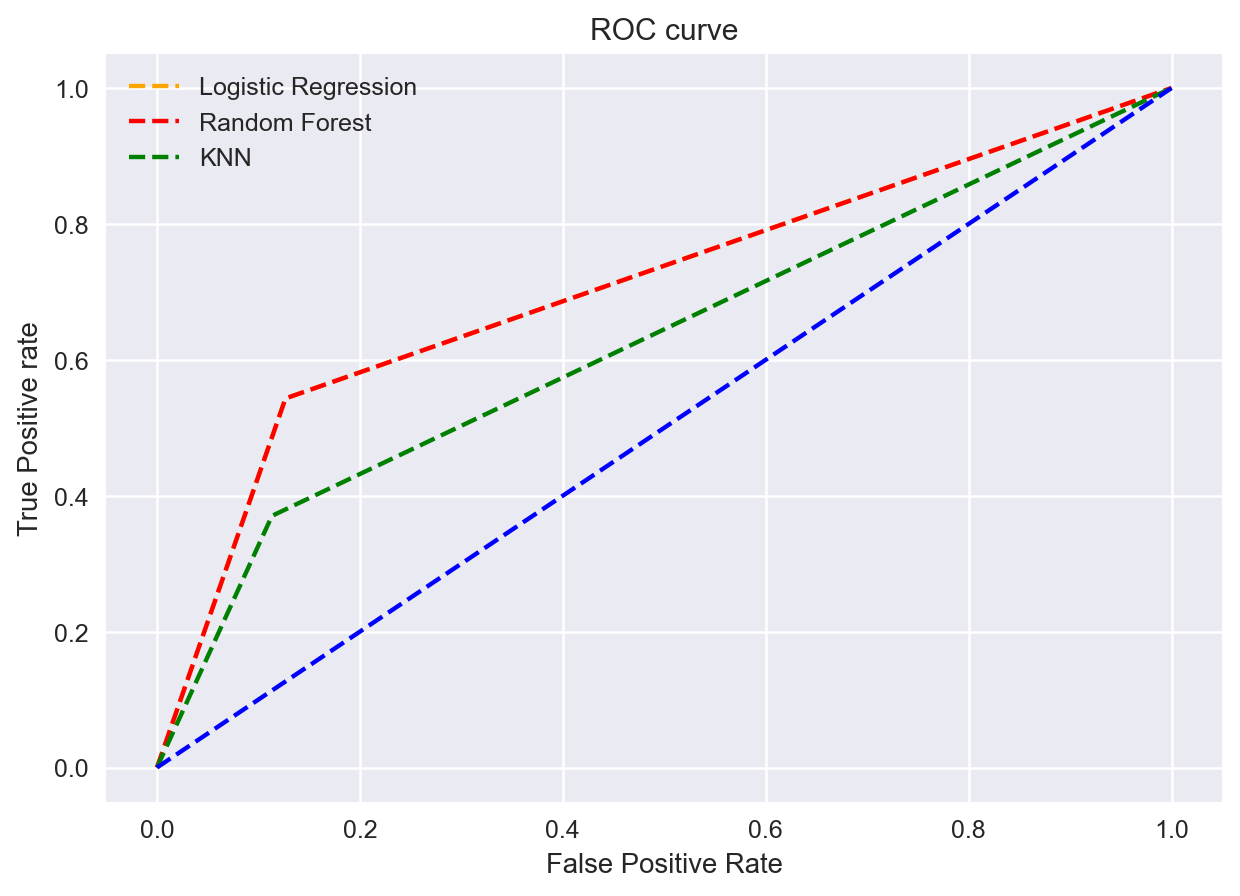

In [58]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='red', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

***Conclusion:*** It's observed that the Random Forest and Logistic Resgression are providing almost same results. KNN model is not producing expected results and the efficiency is too less as compared to other models.